# 5. Working with larger data sets

This workbook uses a large sample dataset in order to more realistically simulate the set up of the analysis process from start to finish. The dataset is not included directly with this code but can be downloaded from Zenodo - https://zenodo.org/record/3630511#.XjHhJGj7SUl

We assume that you have downloaded the data, unpacked it and placed it in the *example_data* folder before running this notebook.

The sample is a Titanium-64 Alloy (https://en.wikipedia.org/wiki/Ti-6Al-4V). The energy of the imaging beam was 89 KeV meaning a wavelenth of ~0.14 Å.

The experiment begins at room temperature, heats for approximately 2000 seconds, is held constant for about 1000 seconds, undergoes a high temperature deformation at around 3400 seconds from the start of the experiment and is then cooled. We expect primarily heaxagonal crystal structure ($\alpha$-phase) at room temperature, BCC crystal structure ($\beta$-phase) and high temperature and some small structural change as a result of the deformation.

We follow the beta structure by fitting peaks corresponding to the BCC Cubic Miller indices: 110, 200 and 220.
We follow the alpha structure by fitting hexagonal indices: 10-10, 0002, 10-11, 10-12, 11-20, 10-13, 11-22, 20-21 and 0004.


## 5.1. Calculating peak angles

Bragg's law gives the angle of scattering from a crystal lattic ($\theta$) as a function of the radiation wavelength planes ($\lambda$):

$$ \lambda = 2d \sin (\theta) $$

For a cubic system the relation beween lattice spacing and the lattice constant ($a$) is:

$$ \frac{1}{d^2} = \frac{h^2 + k^2 + l^2}{a^2}  $$

Combining these gives the relation between the scattering angle, radiation wavelenth and lattice constant:

$$ \sin^2(\theta) = \frac{\lambda^2}{4a^2}(h^2 + k^2 + l^2) $$


For the wavelength 0.14 Å and Ti alpha Cubic lattice constant of 2.95 Å, the approximate 2 theta scattering angles are then:

* 110: 3.84°
* 200: 5.44°
* 220: 7.68°

## 5.2 Finding the peaks

For the Hexagonal indices 

Take the first data file and see how it looks.

Diffraction pattern successfully loaded from file.


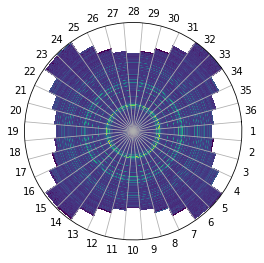

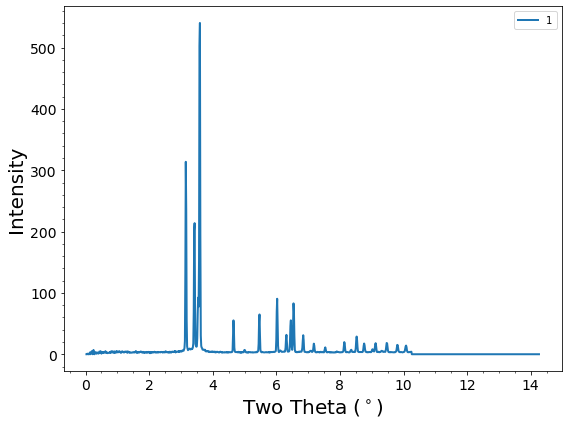

In [1]:
%matplotlib inline

from xrdfit.spectrum_fitting import PeakParams, FitSpectrum, FittingExperiment

spectral_data = FitSpectrum('../example_data/example_data_large/adc_065_TI64_NDload_900C_15mms_00001.dat', 90)
spectral_data.plot_polar()
spectral_data.plot(1)

Zoom in a bit.

## 5.2 Time fitting

In [10]:
frame_time = 1
file_string = '../example_data/example_data_large/adc_065_TI64_NDload_900C_15mms_{:05d}.dat'
first_cake_angle = 90
cakes_to_fit = 1
peak_params = [PeakParams('(10-10)', (3.02, 3.27)), 
               PeakParams('(0002),(110),(10-11)',  (3.3, 3.75), [(3.4, 3.44), (3.52, 3.55), (3.58, 3.62)]),
               PeakParams('(10-12)', (4.54, 4.8)),
               PeakParams('(200)', (4.9, 5.10)),
               PeakParams('(11-20)', (5.35, 5.6)),
               PeakParams('(10-13)', (5.9, 6.2)),
               PeakParams('(11-22),(20-21)',  (6.37, 6.71), [(6.42, 6.47), (6.52, 6.56)]),
               PeakParams('(0004),(220)',  (6.7, 7))]
max_frame = 5657
merge_cakes = False
frames_to_fit = range(1, max_frame, 100)
experiment = FittingExperiment(frame_time, file_string,first_cake_angle, cakes_to_fit, peak_params, merge_cakes, frames_to_fit)

In [11]:
experiment.run_analysis()

Processing 57 diffraction patterns.



Analysis complete.
